In [ ]:
# there's a duplicate of this code on cgi at /cgi/home/varnera/Documents/results/buffer_study'

In [1]:
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import os

import interpolate, marshall_ders

data_path = '/develop/data/meep-dataset-v2/volumes'
library_path = '/develop/code/general_3x3/neighbors_library_allrandom.pkl'

library = pickle.load(open(library_path,'rb'))

In [2]:
z_loc = [0,2,5,10,21,42,62]

def get_variation(x):
    
    return np.std(x, ddof=1) / np.mean(x) #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.variation.html

def collect_data(idx):

    filename = str(idx).zfill(4) + ".pkl"
    temp_path = os.path.join(data_path, filename)
    temp_file = pickle.load(open(temp_path,"rb"))
    temp_file.keys()
    ey_vol = temp_file[1.55][1]
    radii = library[idx]
    print("radii:")
    print(radii)
    print(type(radii))
    var = get_variation(radii)
    radii = np.array(radii).reshape(3,3)
    phases = interpolate.radii_to_phase(radii)
    print(phases)
    LPA_ders = marshall_ders.m_derivatives(phases)
    print(f"ders: {LPA_ders}")
    phase_images = []
    for loc in z_loc:
        ey_slice = ey_vol[:,:,loc]
        phase_images.append(np.angle(ey_slice))
    
    return phases, phase_images, LPA_ders, var

def plot_phase_map(phases,title):
    
    title = "{:.3f}".format(title)
    norm = Normalize(vmin=-np.pi,vmax=np.pi)
    
    fig, ax = plt.subplots(figsize=(2,2))
    heatmap = ax.imshow(phases,cmap='viridis',norm=norm)
    ax.set_xticks([0,1,2])
    ax.set_yticks([0,1,2])
    ax.set_xlabel("grid position")
    ax.set_ylabel("grid position")
    ax.set_title(f"Phases\nVariation = {title}",fontsize=9)
    cbar = plt.colorbar(heatmap)
    cbar.set_label('Phase value')

def taylor_series_expansion(phases, x, y, fx, fy, fxx, fyy, fxy):

    #Calculate the Taylor series expansion for a function at a given point.

    # let the point (a,b) be the place where the function is evaluated.
    a = b = 1
    # let (x,y) be the variables, f(x,y)
    
    # f(a,b) -> This is the value of the central pillar, I think.
    f0 = phases[1,1]

    # fx(a,b)(x-a)
    f1 = fx * (x-a)
    
    # fy(a,b)(y-b)
    f2 = fy * (y-b)
    
    # (fxx(a,b)) / 2 * (x-a)^2
    f3 = 0.5 * fxx * (x - a)**2
    
    # (fxy(a,b)(x-a)(y-b)
    f4 = fxy*(x-a)*(y-b)
    
    # (fyy(a,b) / 2) * (y-b)^2
    f5 = 0.5*fyy * (y-b)**2
    
    ts_func = f0 + f1 + f2 + f3 + f4 +f5
    return ts_func

In [3]:
def plot_from_image(phase_images,title,save=False):
    
    title = "{:.3f}".format(title)
    
    row = int(166/2)
    fig, ax = plt.subplots()
    
    labels = ['At Pillar',r'$\lambda/15$',r'$\lambda/12$', r'$\lambda/9$', r'$\lambda/6$', r'$\lambda/3$', r'$\lambda/2$'] 
    for i,image in enumerate(phase_images):
        
        im_row = image[row,:]
        x = list(range(len(im_row)))
        ax.scatter(x, im_row, s= 5, label=labels[i])
        ax.legend(loc='upper right')
        ax.set_xlabel("Pixel position")
        ax.set_ylabel("Pixel (phase) value [radians]")
        ax.set_ylim([-3.14,3.14])
        
    plt.suptitle(f"Image Line-out\nVariation = {title}")

    plt.tight_layout()
    
    plt.show()
    
    if save == True:
        fig.savefig(f"Images-random/lineplot_idx_{idx}.pdf")

radii:
[0.22787, 0.1806, 0.18664, 0.10417, 0.14138, 0.16351, 0.08807, 0.08807, 0.22989]
<class 'list'>
[[ 2.11545981  0.26597315  0.58798046]
 [-2.68184476 -1.75237756 -0.72918884]
 [-2.89094689 -2.89094689  2.16575344]]
ders: [0.97632796, 1.57846002, 0.09372151, 0.87978138, 1.64604492]


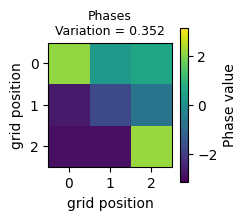

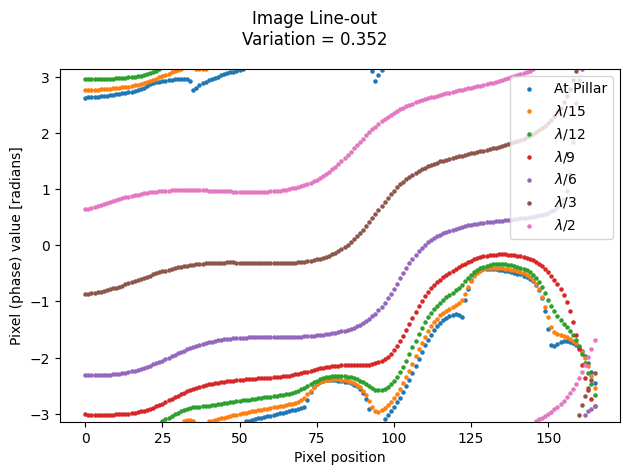

In [4]:
idx = 1

phases, phase_images, LPA_ders, variation = collect_data(idx)
plot_phase_map(phases,variation)
plot_from_image(phase_images,variation,save=False)

In [6]:
path = '/develop/results/job_files/00001.pkl'
test = pickle.load(open(path,'rb'))
test['radii']

[0.08807,
 0.08807,
 0.22989,
 0.10417,
 0.14138,
 0.16351,
 0.22787,
 0.1806,
 0.18664]